Descargando (sync): https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv
Descargando (sync): https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv
Descargando (sync): https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv
Descargando (async): https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv
Descargando (async): https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv
Descargando (async): https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv
Dataset 1 tiene 12 filas y 4 columnas
Dataset 2 tiene 200 filas y 3 columnas
Dataset 3 tiene 16 filas y 9 columnas


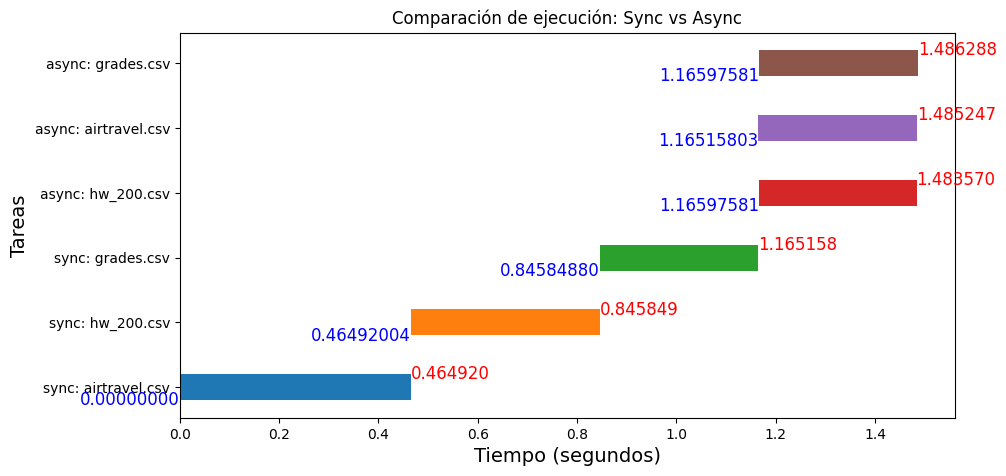

In [24]:
import time
import asyncio
import aiohttp
import pandas as pd
import io
import matplotlib.pyplot as plt

# Registro de tiempos
timeline = []

def log_event(name, start, end):
    '''Guarda el inicio y fin de una tarea'''
    timeline.append({'task': name, 'start': start, 'end': end})


# Función normal (def)
def get_dataset_sync(urls):
    datasets = []
    for url in urls:
        start = time.time()
        print(f'Descargando (sync): {url}')
        df = pd.read_csv(url)
        end = time.time()
        log_event(f"sync: {url.split('/')[-1]}", start, end)
        datasets.append(df)
    return datasets

# Función asíncrona (async)
async def fetch_dataset(session, url):
    start = time.time()
    print(f'Descargando (async): {url}')
    async with session.get(url) as response:
        content = await response.read()
        df = pd.read_csv(io.StringIO(content.decode()))
    end = time.time()
    log_event(f"async: {url.split('/')[-1]}", start, end)
    return df

async def get_dataset_async(urls):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_dataset(session, url) for url in urls]
        datasets = await asyncio.gather(*tasks)
    return datasets


# Ejemplo con URLs de datasets CSV
urls = [
    'https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv',
    'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv',
    'https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv'
]

# Limpiamos timeline
timeline.clear()
datasets_sync = get_dataset_sync(urls)

datasets_async = await get_dataset_async(urls)

# Tamaños de cada dataset
for i, df in enumerate(datasets_async, 1):
    print(f'Dataset {i} tiene {df.shape[0]} filas y {df.shape[1]} columnas')

# Visualización
fig, ax = plt.subplots(figsize=(10,5))

base_time = timeline[0]['start']  # para normalizar tiempos

for i, event in enumerate(timeline):
    start = event['start'] - base_time
    end = event['end'] - base_time
    duration = end - start
    
    # Barra horizontal
    ax.barh(event['task'], duration, left=start, height=0.4)
    
    # Etiquetas de inicio y fin
    ax.text(start, i-0.2, f'{start:.8f}', va='center', ha='right', fontsize=12, color='blue')
    ax.text(end, i+0.2, f'{end:.6f}', va='center', ha='left', fontsize=12, color='red')

ax.set_xlabel('Tiempo (segundos)', fontsize=14)
ax.set_ylabel('Tareas', fontsize=14)
ax.set_title('Comparación de ejecución: Sync vs Async')
plt.show()
